# Steps for this work
   1. Understanding the problem
   2. Collecting and Cleaning the Dataset
   3. Preprossing the dataset
   4. Exploratory Data Analysis (EDA)
   5. Model Building
   6. Model Evaluation
   7. Maintain and use the model

step 1 and 2 and precollection for this intership, know we start from step 3.


# Install Requrie library in python ( if not pre-installed)

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install joblib
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import the Library and dataset

In [2]:
# Import necessary libraries for data manipulation, modeling, and saving.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import joblib

# Load the dataset from the CSV file.
df = pd.read_csv("irigation_System_data.csv")
print("Dataset loaded successfully.")

Dataset loaded successfully.


# Preprocessing the dataset

 we work on different operation 
     1. Handle missing values
     2. Remove duplicate data
     3. Correct inconsistent data
     4. Convert data types
     5. Handle outliers
     6. Encode categorical variables
     7. Scale/Normalize numerical features
     8. Perform data reduction (feature selection/dimensionality reduction)
     9. Integrate data from multiple sources
     10.Split data into training/validation/test sets
     11.Engineer new features

In [3]:
print(df.head().T)


              0    1    2    3    4
Unnamed: 0  0.0  1.0  2.0  3.0  4.0
sensor_0    1.0  5.0  3.0  2.0  4.0
sensor_1    2.0  1.0  1.0  2.0  3.0
sensor_2    1.0  3.0  4.0  4.0  3.0
sensor_3    7.0  5.0  3.0  3.0  2.0
sensor_4    0.0  2.0  4.0  5.0  5.0
sensor_5    1.0  2.0  0.0  0.0  1.0
sensor_6    1.0  1.0  1.0  3.0  3.0
sensor_7    4.0  2.0  6.0  2.0  1.0
sensor_8    0.0  3.0  0.0  2.0  1.0
sensor_9    3.0  1.0  2.0  5.0  2.0
sensor_10   1.0  3.0  3.0  3.0  4.0
sensor_11   3.0  2.0  2.0  1.0  5.0
sensor_12   6.0  2.0  4.0  2.0  3.0
sensor_13   8.0  4.0  3.0  4.0  1.0
sensor_14   1.0  5.0  3.0  1.0  3.0
sensor_15   0.0  5.0  1.0  1.0  2.0
sensor_16   2.0  2.0  0.0  4.0  2.0
sensor_17   1.0  2.0  3.0  1.0  1.0
sensor_18   9.0  2.0  1.0  3.0  1.0
sensor_19   2.0  7.0  0.0  2.0  0.0
parcel_0    0.0  0.0  1.0  0.0  1.0
parcel_1    1.0  0.0  1.0  0.0  1.0
parcel_2    0.0  0.0  0.0  0.0  0.0


In [4]:
df.shape

(2000, 24)

In [5]:
# Total columns list in datasets
df.columns


Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [6]:
# Information of dataset ( like no or columns, shape, size, datatype, memort occupies)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [7]:
# Information of dataset ( like no or columns, shape, size, datatype, memort occupies)
df.isnull().sum()

Unnamed: 0    0
sensor_0      0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
sensor_5      0
sensor_6      0
sensor_7      0
sensor_8      0
sensor_9      0
sensor_10     0
sensor_11     0
sensor_12     0
sensor_13     0
sensor_14     0
sensor_15     0
sensor_16     0
sensor_17     0
sensor_18     0
sensor_19     0
parcel_0      0
parcel_1      0
parcel_2      0
dtype: int64

In [8]:
# Drop the 'Unnamed: 0' column as it serves as an index and not a feature for the model.
df = df.drop('Unnamed: 0', axis=1)

# Separate the features (sensor data) from the target variables (parcel status).
X = df[[f'sensor_{i}' for i in range(20)]]
y = df[['parcel_0', 'parcel_1', 'parcel_2']]

# Use MinMaxScaler to scale the feature data to a range of 0 to 1.
# This helps prevent features with larger values from dominating the learning process.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Data cleaning and scaling complete.")

Data cleaning and scaling complete.


# Exploratory Data Analysis (EDA)
    1. Understand data structure
    2. Calculate descriptive statistics
    3. Visualize data distributions and relationships
    4. Identify patterns and trends
    5. Detect anomalies and outliers
    6. Assess data quality issues (e.g., missing values, duplicates)
    7. Generate initial hypotheses

In [9]:
print("\nPerforming Exploratory Data Analysis (EDA)...")

# Display basic information about the dataset.
print("Dataset Info:",df.info())
                                                                                                                         


Performing Exploratory Data Analysis (EDA)...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  s

In [10]:
# Display descriptive statistics of the numerical features.
print("\nDescriptive Statistics:")
print(df.describe().T)


Descriptive Statistics:
            count    mean       std  min  25%  50%  75%   max
sensor_0   2000.0  1.4370  1.321327  0.0  0.0  1.0  2.0   8.0
sensor_1   2000.0  1.6590  1.338512  0.0  1.0  1.0  2.0   9.0
sensor_2   2000.0  2.6545  1.699286  0.0  1.0  2.0  4.0  10.0
sensor_3   2000.0  2.6745  1.855875  0.0  1.0  2.0  4.0  11.0
sensor_4   2000.0  2.8875  1.816451  0.0  2.0  3.0  4.0  12.0
sensor_5   2000.0  1.4110  1.339394  0.0  0.0  1.0  2.0   7.0
sensor_6   2000.0  3.3155  2.206444  0.0  2.0  3.0  5.0  13.0
sensor_7   2000.0  4.2015  2.280241  0.0  3.0  4.0  6.0  12.0
sensor_8   2000.0  1.2140  1.386782  0.0  0.0  1.0  2.0   8.0
sensor_9   2000.0  1.9010  1.518668  0.0  1.0  2.0  3.0   9.0
sensor_10  2000.0  3.0875  1.821127  0.0  2.0  3.0  4.0  10.0
sensor_11  2000.0  3.6085  2.058482  0.0  2.0  3.0  5.0  12.0
sensor_12  2000.0  4.3255  2.200220  0.0  3.0  4.0  6.0  15.0
sensor_13  2000.0  2.7315  1.774537  0.0  1.0  2.0  4.0  11.0
sensor_14  2000.0  3.4160  1.960578  0.0  2.0

# Visualization 

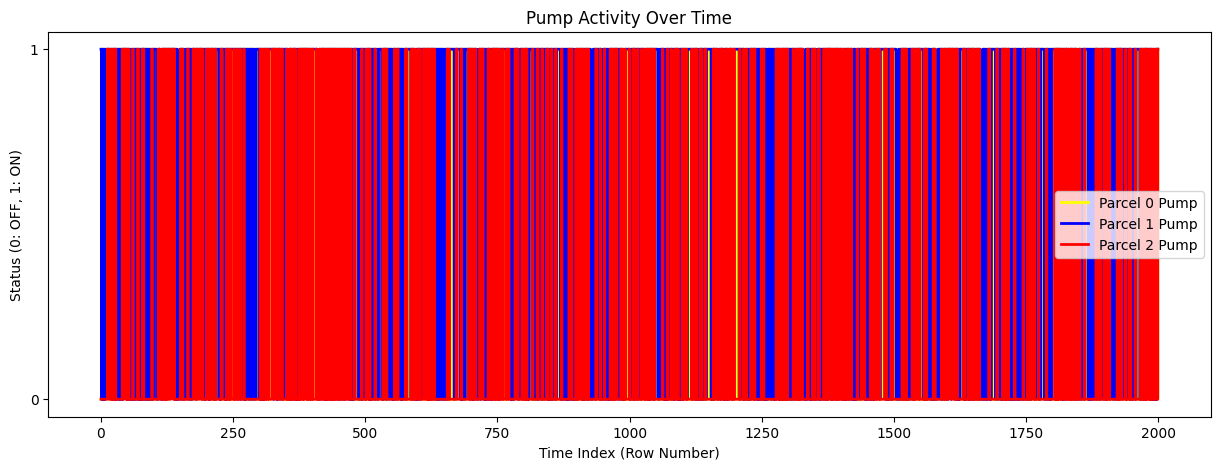

In [11]:
# Visualize the distribution of sprinkler activity over time for each parcel.
plt.figure(figsize=(15, 5))
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='yellow')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='blue')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='red')
plt.title("Pump Activity Over Time")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status (0: OFF, 1: ON)")
plt.yticks([0, 1])
plt.legend()
plt.show()

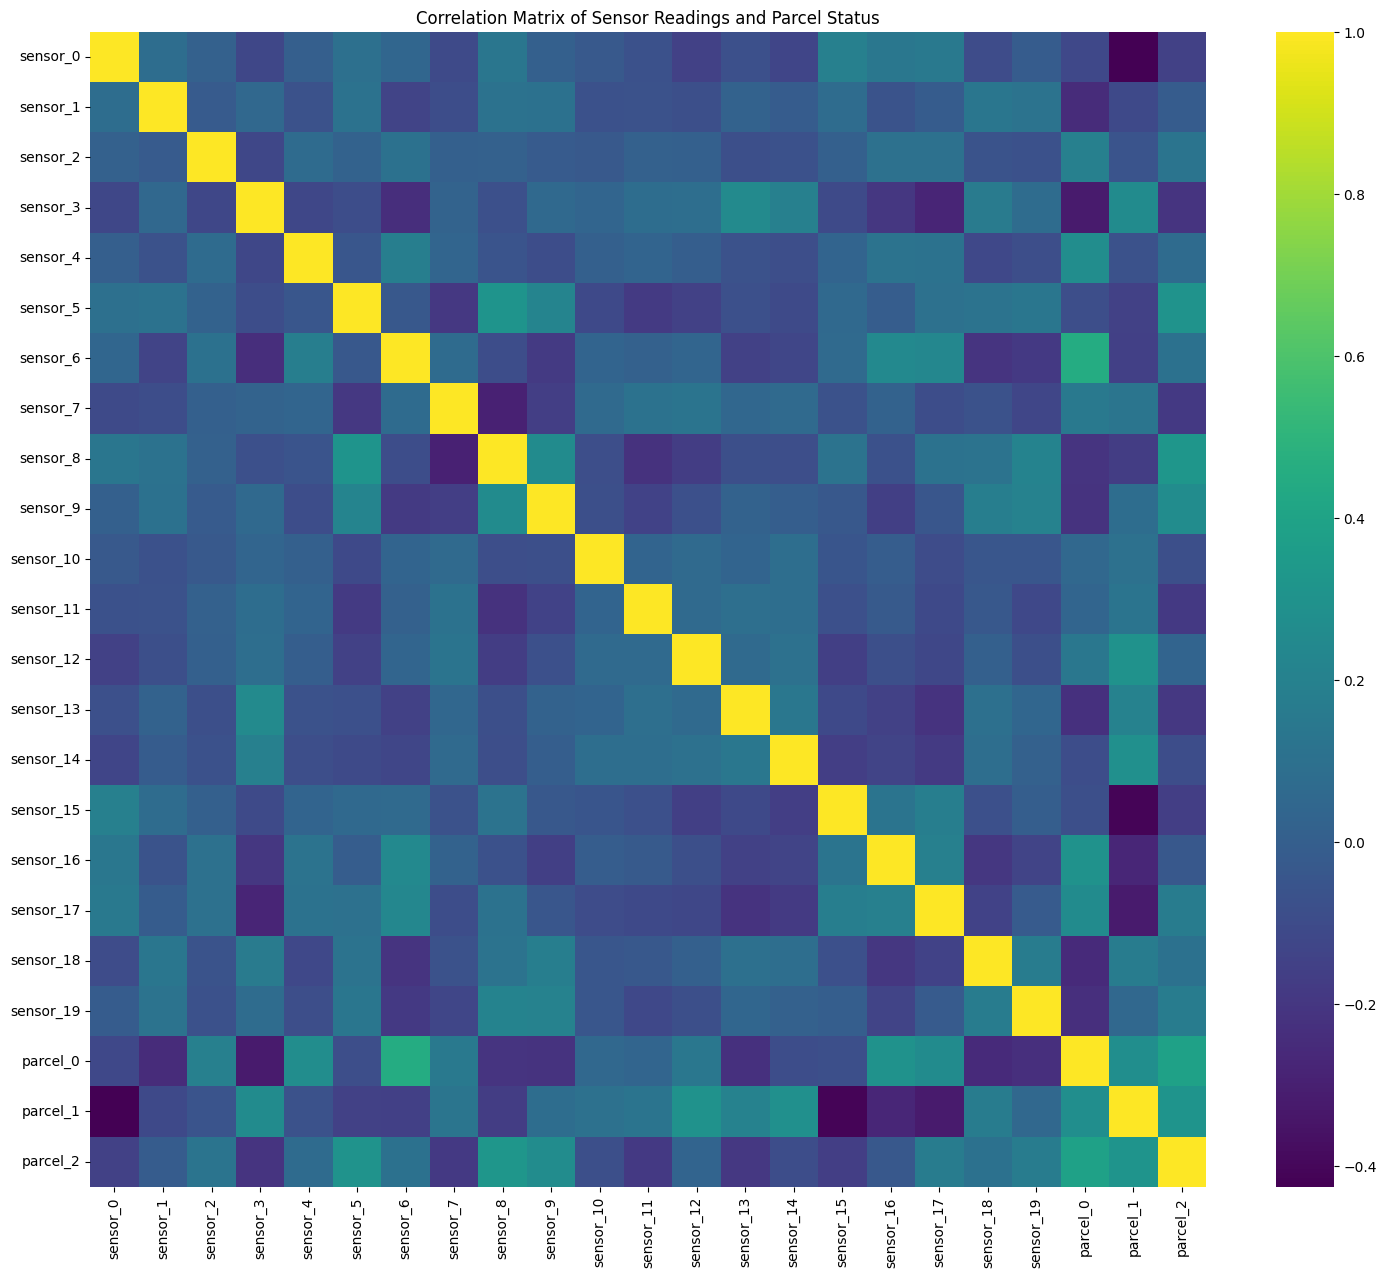

EDA complete. Visualizations generated.


In [12]:
# Visualize the correlation matrix to understand relationships between features and labels.
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.title("Correlation Matrix of Sensor Readings and Parcel Status")
plt.show()
print("EDA complete. Visualizations generated.")

# Train and Test dataset Splitting

In [13]:
# Split the scaled data into training and testing sets, with 80% for training and 20% for testing.
# A random_state is set for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData splitting complete:")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Data splitting complete:
Training features shape: (1600, 20)
Testing features shape: (400, 20)
Training labels shape: (1600, 3)
Testing labels shape: (400, 3)


# Find the best one algorithm for this project dataset


Step 5: Applying and comparing different algorithms...
--- Training Random Forest ---

Classification Report for Random Forest:
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647

--------------------------------------------------
--- Training Decision Tree ---

Classification Report for Decision Tree:
              precision    recall  f1-score   support

    parcel_0       0.83      0.84      0.83       256
    parcel_1       0.90      0.85      0.87       304
    parcel_2       0.58      0.52      0.55        87

   micro avg       0.83      0.80      0.81       647
   macro avg       0.77      0.73      0

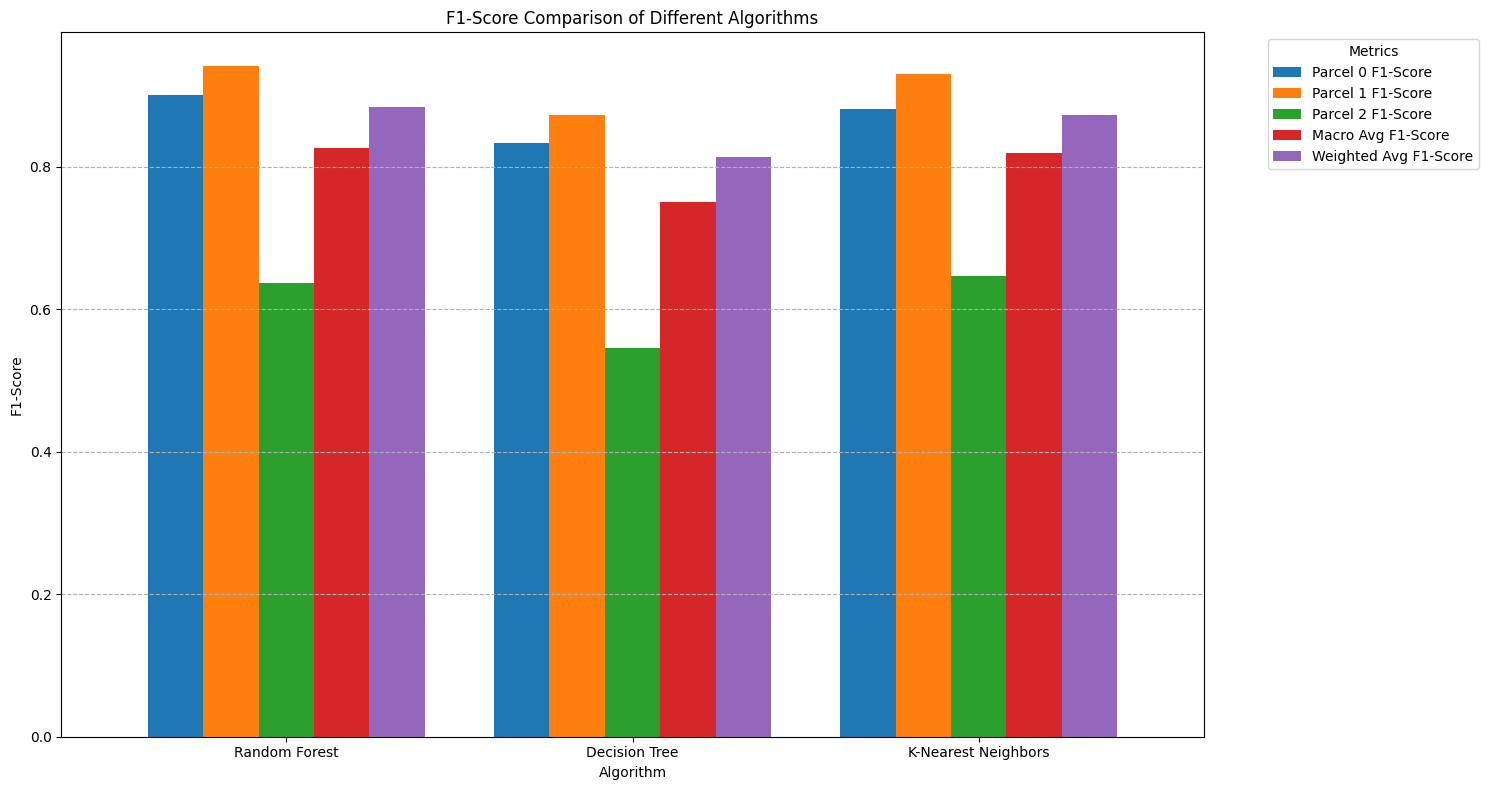

In [14]:
print("\nStep 5: Applying and comparing different algorithms...")

# Dictionary to hold different models for comparison
models = {
    "Random Forest": MultiOutputClassifier(RandomForestClassifier(
        n_estimators=200, 
        max_depth=10, 
        min_samples_split=4, 
        min_samples_leaf=2, 
        random_state=42
    )),
    "Decision Tree": MultiOutputClassifier(DecisionTreeClassifier(random_state=42)),
    "K-Nearest Neighbors": MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5))
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report_dict = classification_report(y_test, y_pred, target_names=y.columns, zero_division=0, output_dict=True)
    
    # Store key metrics for the summary table
    results[name] = {
        'Parcel 0 F1-Score': report_dict['parcel_0']['f1-score'],
        'Parcel 1 F1-Score': report_dict['parcel_1']['f1-score'],
        'Parcel 2 F1-Score': report_dict['parcel_2']['f1-score'],
        'Macro Avg F1-Score': report_dict['macro avg']['f1-score'],
        'Weighted Avg F1-Score': report_dict['weighted avg']['f1-score']
    }

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=y.columns, zero_division=0))
    print("-" * 50)

# Create a DataFrame from the results dictionary for a clean, tabular output
performance_df = pd.DataFrame(results).T

# Determine the best model based on the Macro Average F1-Score
best_model_name = performance_df['Macro Avg F1-Score'].idxmax()

print("\nOverall Algorithm Performance (F1-Score):")
print(performance_df)
print(f"\nThe best performing algorithm based on macro average F1-score is: {best_model_name}")

# Visualize the performance for a clear comparison
performance_df.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.title("F1-Score Comparison of Different Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("F1-Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

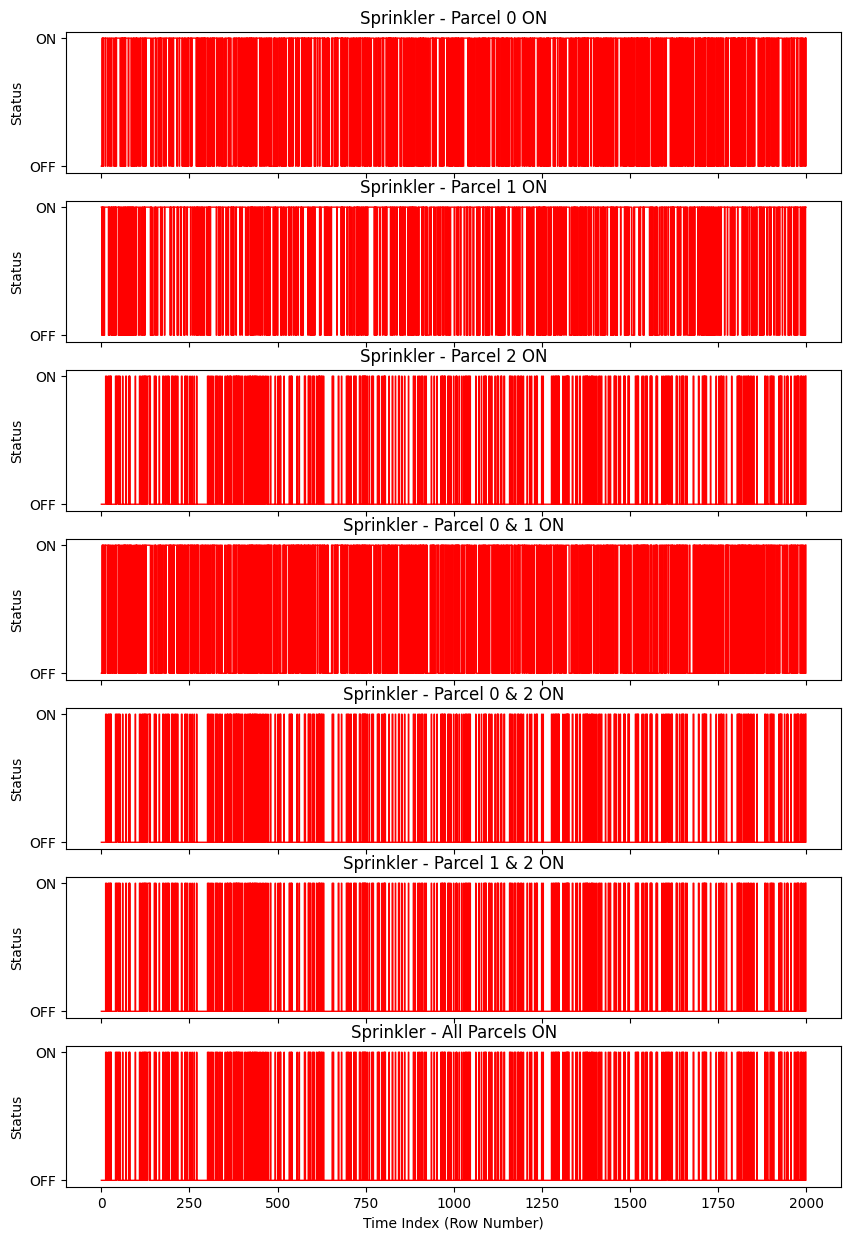

In [15]:
import matplotlib.pyplot as plt

# Define parcel activation conditions with descriptive labels
conditions = {
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

# Create vertically stacked subplots (one for each condition)
fig, axs = plt.subplots(nrows=len(conditions), figsize=(10,15), sharex=True)

# Loop through each condition to plot corresponding square wave
for ax, (title, condition) in zip(axs, conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='red')
    ax.set_title(f"Sprinkler - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])
   

# Label x-axis on the last subplot
axs[-1].set_xlabel("Time Index (Row Number)")

# Plot
plt.show()

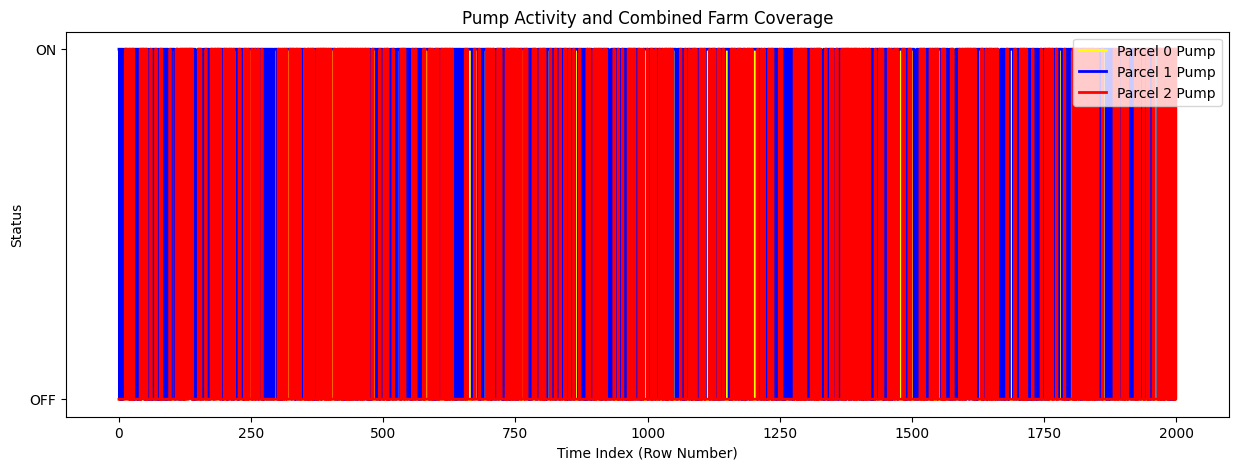

In [16]:
# Calculate combined activity of all pumps (overlap)
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(15, 5))

# Plot individual pump statuses
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='yellow')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='blue')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='red')

plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()

In [17]:
print("\nStep 6: Saving the best performing model...")

import joblib
from sklearn.pipeline import Pipeline

joblib.dump(model, "Farm_Irrigation_System.pkl")




Step 6: Saving the best performing model...


['Farm_Irrigation_System.pkl']